# Variable correlation analysisnotebook



## Data set



### Node info

APs are stationary and colocated. Clients are mobile and colocated. Data flows in the AP -> client direction, so clients are also referred to as receivers.

| 802.11 type | AP lat | AP lon | channel | cntr. freq (MHz) | bw (MHz) |
|-------------|--------|--------|---------|------------------|----------|
| n | 41.111879 | -8.631146 | 6 | 2437 | 20 |
| ac (wave 1) | 41.111879 | -8.631146 | 40 | 5200 | 40 |
| ad | 41.111879 | -8.631146 | 1 | 60480 | 2160 |

Main clients, all positioned in the moving vehicle's roof, a VW Golf Mk 3:

| 802.11 type | radio | nr. antennas |
|-------------|-----------------------------------|---|
| n           | csl usb 2.0 wlan Adapter 300 Mbps | 2 |
| ac          | tp-link archer t4uh               | 2 |
| ad          | tp-link talon ad7200 (tp-03)      | ? |

Monitor nodes, used to collect frame parameters unavailable from main clients. They were colocated with the main clients. Details are:

| 802.11 type | radio | nr. antennas |
|-------------|-------|--------------|
| n | csl usb 2.0 wlan adapter 300 Mbps | 2 |
| ac | tp-link talon ad7200 (tp-02) | 8 |
| ad | tp-link talon ad7200 (tp-02) | ? |

Background clients, used to induce channel utilization diversity. They were static, and place near the AP. Details:

| 802.11 type | radio | nr. antennas | position |
|-------------|-------|--------------|----------|
| n | tp-link wn722n | 1 | ~2m away from AP |
| n | tp-link wn722n | 1 | ~2m away from AP |
| ac | csl usb 2.0 wlan Adapter 300 Mbps | 2 | ~2m away from AP |
| ac | csl usb 2.0 wlan Adapter 300 Mbps | 2 | ~2m away from AP |
| ad | tp-link talon ad7200 (tp-04) | ? | stopped vehicle's roof (so very near AP) |


### Trace info

The data is divided into traces. Each trace represents a uninterrupted experimental period.
Traces vari

| trace nr | date | start time | #samples w/ successful reception (802.11n) | #samples w/ successful reception (802.11ac) | #samples w/ successful reception (802.11ad) | AP vehicle | nr. clients |
|-----|------------|----------|------|------|-----| --- | --- |
| 302 | 2019-08-20 | 10:28:45 | 3262 | 2787 | 423 | Honda Civic sedan (2001) | 1 |
| 303 | 2019-08-20 | 11:26:23 | 3374 | 3027 | 312 | Honda Civic sedan (2001) | 2 |
| 304 | 2019-08-20 | 12:39:46 | 1711 | 216  | 14  | Honda Civic sedan (2001) | 3 (n & ac) 2 (ad) |
| 401 | 2019-08-22 | 10:19:24 | 1685 | 1681 | 545 | Peugeot Partner van (2002) | 1 |
| 402 | 2019-08-22 | 10:48:26 | 2859 | 2827 | 764 | Peugeot Partner van (2002) | 2 |
| 403 | 2019-08-22 | 11:39:36 | 135 | 135 | 116 | Peugeot Partner van (2002) | 2 |
| 404 | 2019-08-22 | 11:42:50 | 114 | 114 | 53 | Peugeot Partner van (2002) | 2 |
| 405 | 2019-08-22 | 11:45:07 | 2019 | 2019 | 507 | Peugeot Partner van (2002) | 2 |


### Feature info

Each row represents 1-second worth of data, and is comprised of many features (columns):

* **systime** : system time (1 Hz resolution) that this row refers to. All node clocks were synchronized through NTP.
* **traceNr** : nr. of the trace the row belongs to. 
* **lon** : longitude (in decimal degrees) reported by the client's GPS at `systime`.
* **lat** : latitude (in decimal degrees) reported by the client's GPS at `systime`.
* **receiverAlt** : altitude (in meters) reported by the client's GPS at `systime`.
* **receiverX** : x coordinate of the client's position when space is discretized as a Cartesian plane and the AP is set to be the origin of the coordinate system. The x axis corresponds to east-west (positive values are east, negative values are west). Unit is meters.
* **receiverY** : y coordinate of the client's position when space is discretized as a Cartesian plane, in meters.
* **receiverDist** : great-circle distance (in meters) between AP and client, computed by the haversine formula.
* **receiverSpeed** : speed (in m/s) reported by the client's GPS at `systime`.
* **receiverId** : system-specific id for the client (in the vehicle).
* **senderId** : system-specific id for the AP serving the client.
* **isIperfOn** : 1 if the row's `systime` corresponds to a period where iperf (the app used to send and receive data) is known to have been running on the receiver side, and 0 otherwise. Should always be 1.
* **isInLap** : 1 if this row's systime has been marked as being part of a time period where clients were doing laps around the APs, and 0 otherwise. **This feature is unreliable and should be ignored.**
* **rssiMean** : the mean of the RSSI (Received Signal Strength Indicator) values of AP data frames received by the client during the 1-second period the row refers to. Measured in dBm. **For 802.11ad, we retrieve RSSI from sector sweep feedback frames.**
* **snrMean** : the mean of the SNR (Signal-to-Noise Ratio) values of AP data frames received by the client during the 1-second period the row refers to. Only valid for 802.11ad rows.
* **channelFreq** : center frequency of the WiFi channel used, in MHz.
* **channelBw** : channel width of the WiFi channel used, in MHz.
* **channelUtil** : percentage of time the wireless medium was sensed to be busy during the 1-second period the row refers to. A value of -1 indicates an absense of data. **In traces numbered 40x, the 802.11n and ac routers didn't log channel busy time, and as such we had to approximate channel util. based on x,y coordinates and nr. of active clients.**
* **dataRateMedian** : the median of the data rate values of AP data frames received by client second period the row refers to, in Mbps.
* **dataRateMean** : the mean of the data rate values of AP data frames received by the client during the 1-second period the row refers to, in Mbps.
* **nBytesReceived** : total number of bytes received by the client from the ap during the 1-second period systime period the row refers to, in Bytes.
* **tghptConsumer**: throughput reported by the receiving end of iperf, during the 1-second period the row refers to, in Mbps.
* **wifiType** : IEEE 802.11 network type, i.e. n, ac or ad.
* **nrClients** : total number of clients operating on the same channel and bandwidth as `receiverId` during the 1-second period the row refers to.
* **nRetries** : total number of frames marked as being retries (i.e. retransmissions due to loss) during the 1-second period the row refers to.
* **meanBeaconRssi** : the mean of the RSSI (Received Signal Strength Indicator) values of AP beacon frames received by the client during the 1-second period the row refers to. Measured in dBm.
* **meanInterBeaconTime** : the mean of the interval between AP beacon frames received by the client during the 1-second period the row refers to. Measured in seconds.
* **nBeacons** : the total number of beacons received during the 1-second period the row refers to.


### Dataset loading 


In [2]:
import warnings
import pandas
import sys
import numpy as np

warnings.filterwarnings('ignore')

dframe = pandas.read_csv("./wifi-exp-log-summary.csv")

dframe = dframe.reset_index(drop = True) # creates index column, numbered from 0 to n-1

print("Loaded data set (%d rows)" % (len(dframe)))

# let's now filter out stuff we don't want
dframe = dframe.loc[dframe['isIperfOn'] == 1] # filter out periods when iperf was off
dframe.drop(['isIperfOn'], axis = 1, inplace = True)


# Split up days
dfday1 = dframe[:26130]
dfday2 = dframe[26130:]
dfday1['systime'] = dfday1['systime'] - dfday1.iloc[0]['systime']
dfday2['systime'] = dfday2['systime'] - dfday2.iloc[0]['systime']
#print(dfday1['systime'])
# print(dfday2['systime'])


dframe = dframe.reset_index(drop = True) # creates index column, numbered from 0 to n-1

dframes = []
for df in [dfday1, dfday2]:
    for wifi in ['n', 'ac', 'ad']: 
        dframeNew = df[df['wifiType'] == wifi]  # focus on a particular type of wifi
        dframes.append(dframeNew)

    
#print("After filtering, left with %d rows\n" % (len(dframe)))

#print("Sample summary:")
#with pandas.option_context('display.max_rows', None, 'display.max_columns', None):
  #print(dframe.groupby(['wifiType']).size().reset_index(drop = False, name = 'nr-samples'))
  #print(dframe['systime'])


Loaded data set (46566 rows)


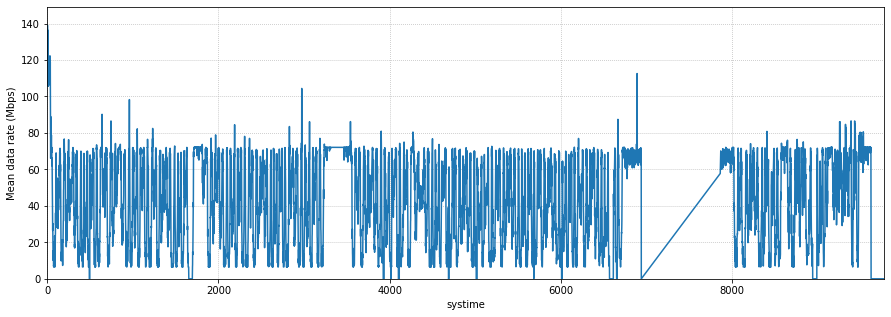

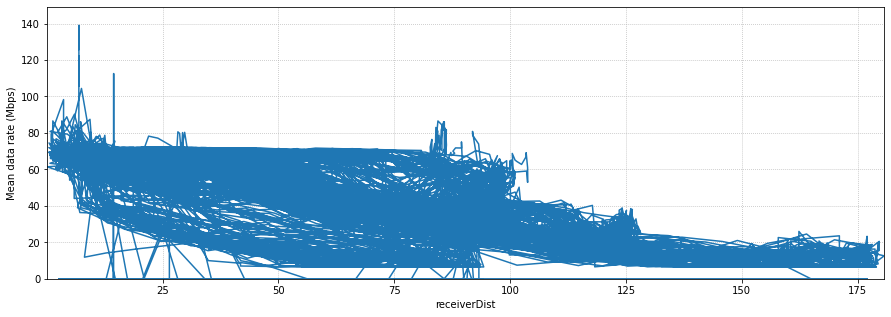

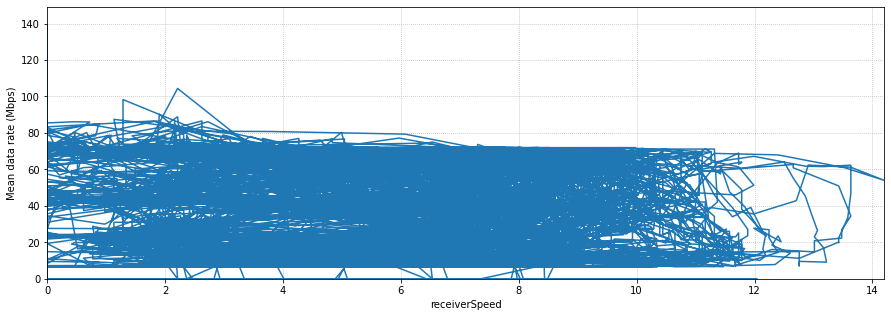

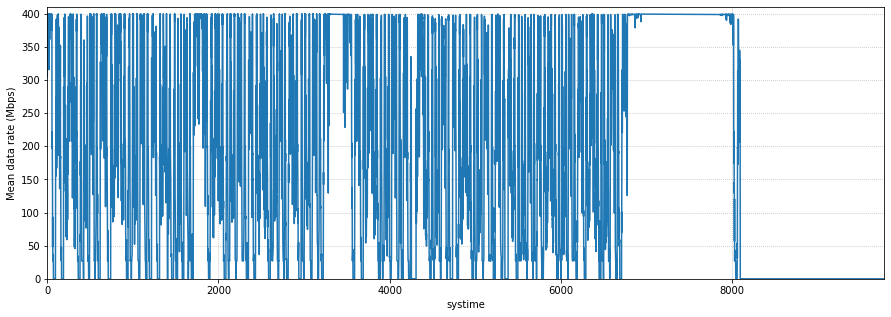

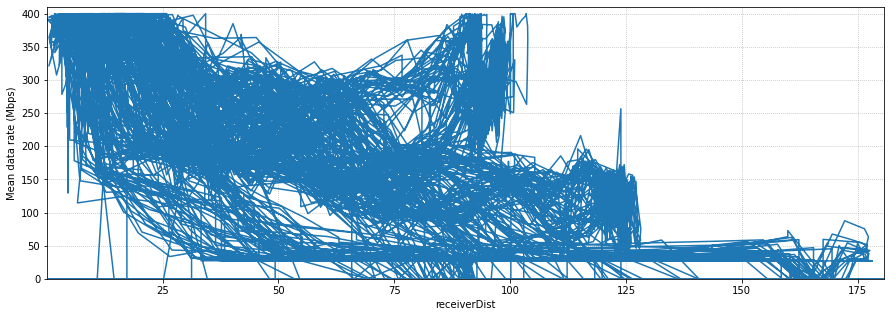

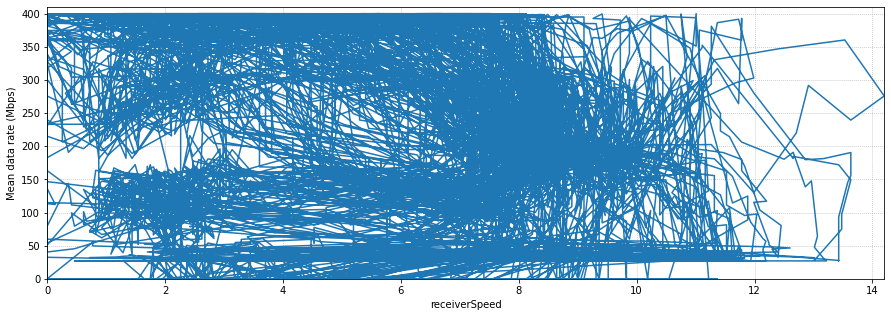

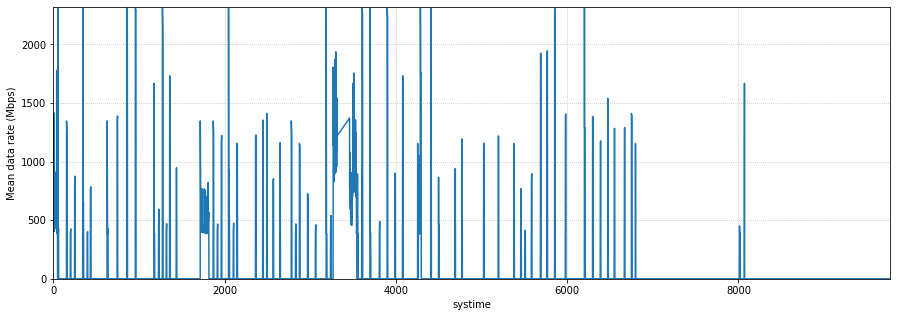

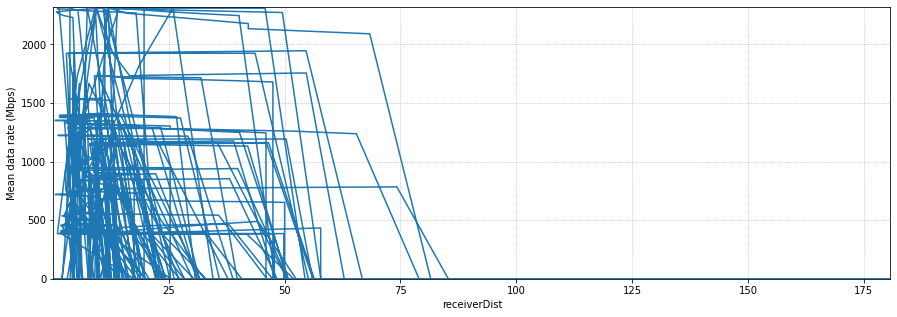

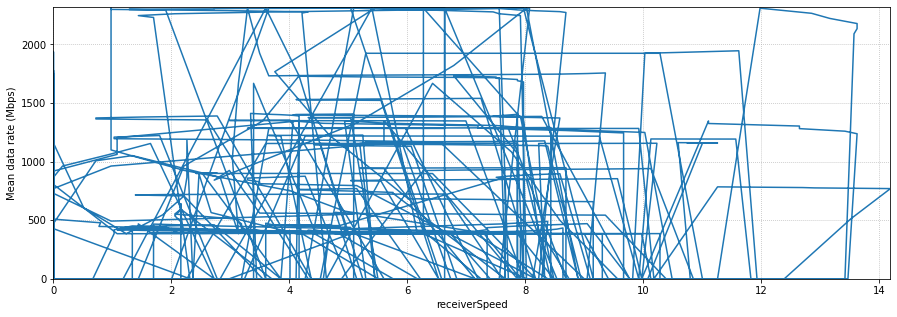

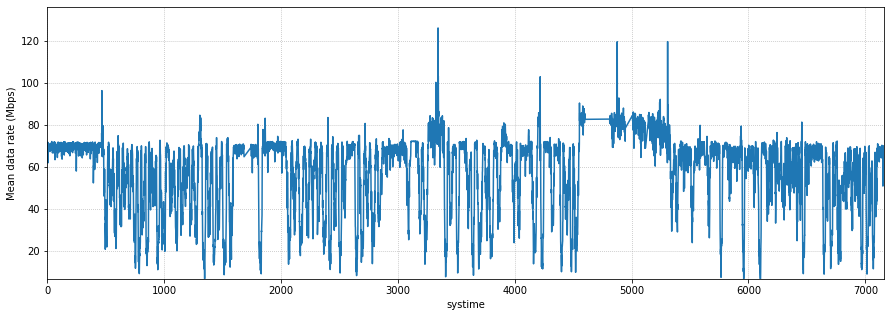

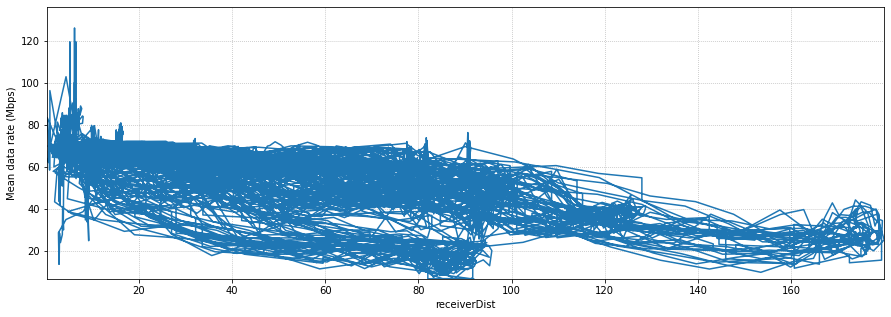

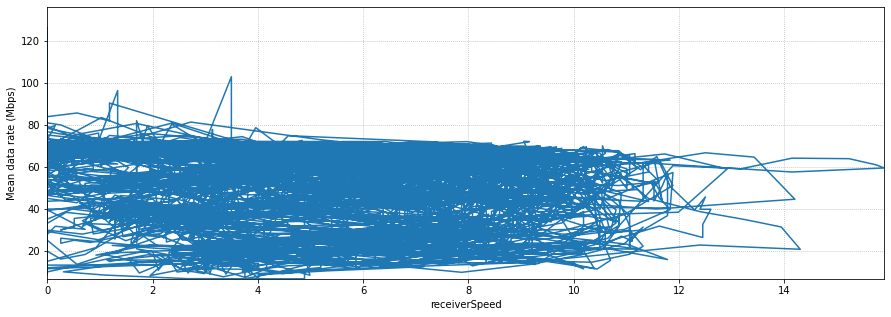

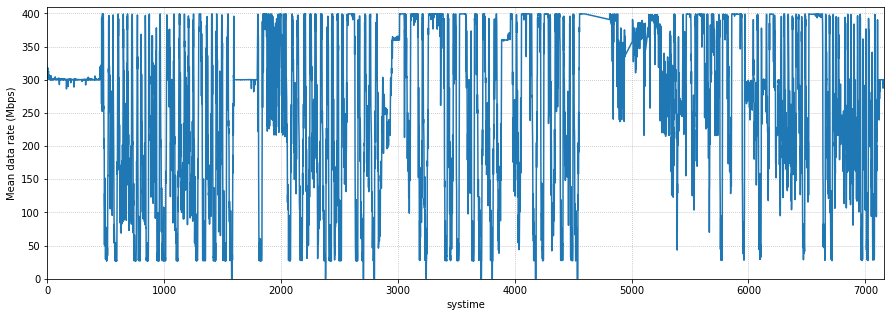

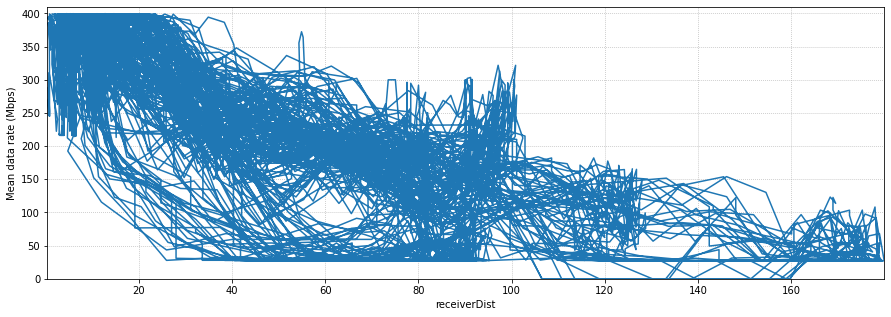

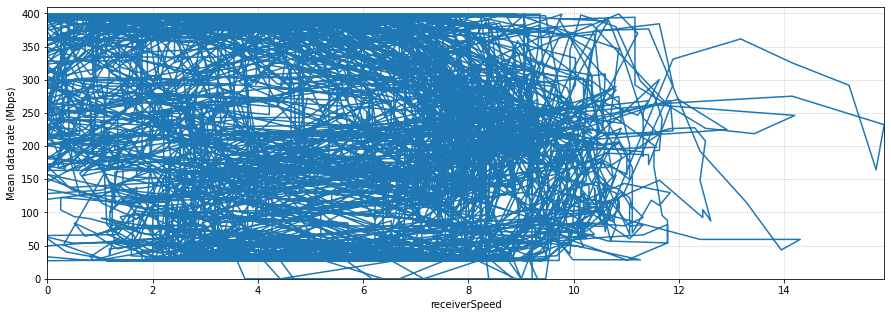

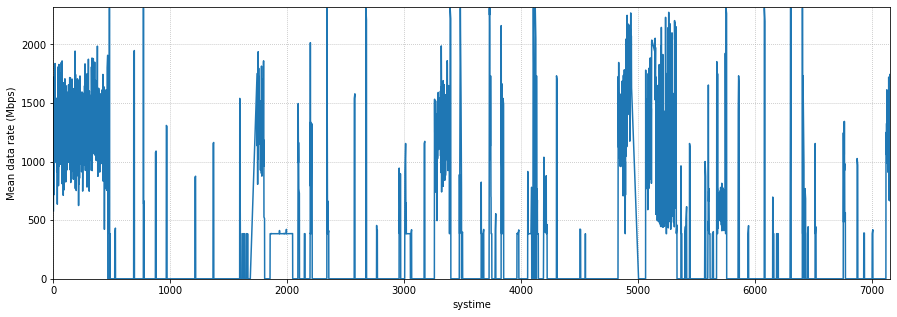

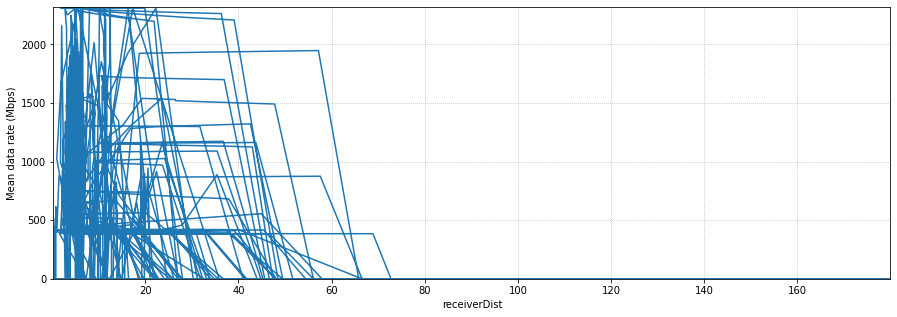

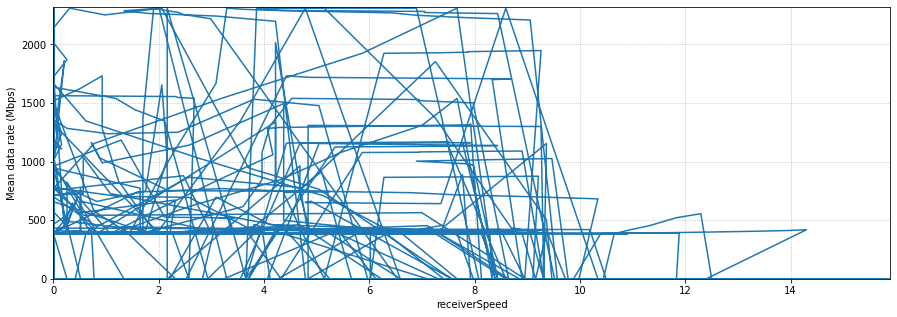

In [21]:
    # Plots of different wifi types vs datarate over time
import matplotlib.pyplot as plt

for wifi in dframes:
     for xval in ['systime', 'receiverDist', 'receiverSpeed']:
        fig = plt.figure(figsize=(15, 5))
        ##plt.title(f"802.11{wifi['wifiType'][0]} experiment for 2019/08/20")
        plt.xlabel(xval)
        plt.ylabel("Mean data rate (Mbps)")
        plt.grid(True, ls="dotted", lw=0.75)
        plt.xlim([min(wifi[xval]), max(wifi[xval])])
        plt.ylim([min(wifi["dataRateMean"]), max(wifi["dataRateMean"]) + 10])
        plt.plot(wifi[xval], wifi["dataRateMean"])
        plt.show()

In [19]:
for df in dframes:  
    corMat= df.corr(method="kendall")
    display(corMat.style.background_gradient(cmap="coolwarm", axis=None).set_precision(2))

,systime,traceNr,lon,lat,receiverAlt,receiverX,receiverY,receiverDist,receiverSpeed,isInLap,rssiMean,snrMean,channelFreq,channelBw,channelUtil,dataRateMedian,dataRateMean,nBytesReceived,tghptConsumer,nrClients,nRetries,meanBeaconRssi,meanInterBeaconTime,nBeacons
systime,1.00,0.80,-0.01,0.01,-0.14,0.01,0.01,-0.08,-0.08,nan,-0.00,nan,nan,nan,0.21,0.01,0.01,-0.19,-0.15,0.80,-0.27,0.01,0.06,-0.06
traceNr,0.80,1.00,-0.02,0.02,-0.14,0.02,0.02,-0.08,-0.09,nan,0.01,nan,nan,nan,0.27,0.02,0.02,-0.23,-0.18,1.00,-0.31,0.03,0.03,-0.03
lon,-0.01,-0.02,1.00,0.12,0.45,-1.00,0.12,-0.19,-0.12,nan,0.18,nan,nan,nan,0.09,0.17,0.17,0.12,0.16,-0.02,0.06,0.18,0.20,-0.21
lat,0.01,0.02,0.12,1.00,0.28,-0.12,1.00,-0.00,-0.07,nan,0.18,nan,nan,nan,0.23,0.25,0.23,0.26,0.26,0.02,0.30,0.18,-0.11,0.11
receiverAlt,-0.14,-0.14,0.45,0.28,1.00,-0.45,0.28,-0.06,-0.08,nan,0.06,nan,nan,nan,0.01,0.08,0.07,0.10,0.09,-0.14,0.14,0.07,0.16,-0.17
receiverX,0.01,0.02,-1.00,-0.12,-0.45,1.00,-0.12,0.19,0.12,nan,-0.18,nan,nan,nan,-0.09,-0.17,-0.17,-0.12,-0.16,0.02,-0.06,-0.18,-0.20,0.21
receiverY,0.01,0.02,0.12,1.00,0.28,-0.12,1.00,-0.00,-0.07,nan,0.18,nan,nan,nan,0.23,0.25,0.23,0.26,0.26,0.02,0.30,0.18,-0.11,0.11
receiverDist,-0.08,-0.08,-0.19,-0.00,-0.06,0.19,-0.00,1.00,0.03,nan,-0.59,nan,nan,nan,-0.30,-0.52,-0.51,-0.38,-0.42,-0.08,-0.15,-0.60,-0.10,0.10
receiverSpeed,-0.08,-0.09,-0.12,-0.07,-0.08,0.12,-0.07,0.03,1.00,nan,-0.05,nan,nan,nan,-0.03,-0.06,-0.07,-0.07,-0.08,-0.09,0.12,-0.05,-0.10,0.11
isInLap,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


,systime,traceNr,lon,lat,receiverAlt,receiverX,receiverY,receiverDist,receiverSpeed,isInLap,rssiMean,snrMean,channelFreq,channelBw,channelUtil,dataRateMedian,dataRateMean,nBytesReceived,tghptConsumer,nrClients,nRetries,meanBeaconRssi,meanInterBeaconTime,nBeacons
systime,1.00,0.80,-0.01,0.01,-0.14,0.01,0.01,-0.08,-0.08,nan,-0.24,nan,nan,nan,-0.06,-0.26,-0.25,-0.25,-0.05,0.80,-0.28,-0.03,-0.07,-0.03
traceNr,0.80,1.00,-0.02,0.02,-0.14,0.02,0.02,-0.08,-0.09,nan,-0.29,nan,nan,nan,-0.07,-0.32,-0.31,-0.30,-0.08,1.00,-0.33,-0.03,-0.07,-0.03
lon,-0.01,-0.02,1.00,0.12,0.45,-1.00,0.12,-0.19,-0.12,nan,0.23,nan,nan,nan,0.10,0.26,0.25,0.22,0.27,-0.02,0.15,0.02,0.05,0.02
lat,0.01,0.02,0.12,1.00,0.28,-0.12,1.00,-0.00,-0.07,nan,0.19,nan,nan,nan,0.25,0.22,0.22,0.22,0.25,0.02,0.36,0.05,0.11,0.05
receiverAlt,-0.14,-0.14,0.45,0.28,1.00,-0.45,0.28,-0.06,-0.08,nan,0.22,nan,nan,nan,0.20,0.25,0.24,0.21,0.18,-0.14,0.25,0.03,0.08,0.03
receiverX,0.01,0.02,-1.00,-0.12,-0.45,1.00,-0.12,0.19,0.12,nan,-0.23,nan,nan,nan,-0.10,-0.26,-0.25,-0.22,-0.27,0.02,-0.15,-0.02,-0.05,-0.02
receiverY,0.01,0.02,0.12,1.00,0.28,-0.12,1.00,-0.00,-0.07,nan,0.19,nan,nan,nan,0.25,0.22,0.22,0.22,0.25,0.02,0.36,0.05,0.11,0.05
receiverDist,-0.08,-0.08,-0.19,-0.00,-0.06,0.19,-0.00,1.00,0.03,nan,-0.37,nan,nan,nan,0.02,-0.34,-0.33,-0.32,-0.45,-0.08,-0.10,-0.02,-0.03,-0.02
receiverSpeed,-0.08,-0.09,-0.12,-0.07,-0.08,0.12,-0.07,0.03,1.00,nan,-0.06,nan,nan,nan,0.22,-0.07,-0.07,-0.07,-0.12,-0.09,0.07,0.03,0.06,0.03
isInLap,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


,systime,traceNr,lon,lat,receiverAlt,receiverX,receiverY,receiverDist,receiverSpeed,isInLap,rssiMean,snrMean,channelFreq,channelBw,channelUtil,dataRateMedian,dataRateMean,nBytesReceived,tghptConsumer,nrClients,nRetries,meanBeaconRssi,meanInterBeaconTime,nBeacons
systime,1.00,0.80,-0.01,0.01,-0.14,0.01,0.01,-0.08,-0.08,nan,nan,-0.05,nan,nan,-0.11,-0.14,-0.14,-0.14,-0.02,0.69,-0.11,nan,-0.01,-0.06
traceNr,0.80,1.00,-0.02,0.02,-0.14,0.02,0.02,-0.08,-0.09,nan,nan,-0.06,nan,nan,-0.13,-0.14,-0.14,-0.14,-0.03,0.85,-0.10,nan,-0.01,-0.08
lon,-0.01,-0.02,1.00,0.12,0.45,-1.00,0.12,-0.19,-0.12,nan,nan,0.01,nan,nan,0.03,-0.00,-0.00,-0.01,0.01,-0.00,-0.02,nan,0.00,0.04
lat,0.01,0.02,0.12,1.00,0.28,-0.12,1.00,-0.00,-0.07,nan,nan,0.03,nan,nan,0.06,0.01,0.01,-0.00,0.03,0.04,-0.01,nan,-0.03,0.05
receiverAlt,-0.14,-0.14,0.45,0.28,1.00,-0.45,0.28,-0.06,-0.08,nan,nan,-0.05,nan,nan,0.01,-0.03,-0.03,-0.03,-0.07,-0.12,-0.05,nan,0.04,-0.02
receiverX,0.01,0.02,-1.00,-0.12,-0.45,1.00,-0.12,0.19,0.12,nan,nan,-0.01,nan,nan,-0.03,0.00,0.00,0.01,-0.01,0.00,0.02,nan,-0.00,-0.04
receiverY,0.01,0.02,0.12,1.00,0.28,-0.12,1.00,-0.00,-0.07,nan,nan,0.03,nan,nan,0.06,0.01,0.01,-0.00,0.03,0.04,-0.01,nan,-0.03,0.05
receiverDist,-0.08,-0.08,-0.19,-0.00,-0.06,0.19,-0.00,1.00,0.03,nan,nan,-0.35,nan,nan,-0.46,-0.32,-0.32,-0.33,-0.29,-0.04,-0.23,nan,0.21,-0.45
receiverSpeed,-0.08,-0.09,-0.12,-0.07,-0.08,0.12,-0.07,0.03,1.00,nan,nan,-0.22,nan,nan,-0.08,-0.10,-0.10,-0.11,-0.28,-0.05,-0.19,nan,0.26,-0.20
isInLap,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


,systime,traceNr,lon,lat,receiverAlt,receiverX,receiverY,receiverDist,receiverSpeed,isInLap,rssiMean,snrMean,channelFreq,channelBw,channelUtil,dataRateMedian,dataRateMean,nBytesReceived,tghptConsumer,nrClients,nRetries,meanBeaconRssi,meanInterBeaconTime,nBeacons
systime,1.00,0.82,0.11,0.02,-0.22,-0.11,0.02,-0.01,-0.03,nan,-0.05,nan,nan,nan,0.35,0.01,0.00,-0.24,-0.20,0.61,-0.25,-0.06,-0.04,0.04
traceNr,0.82,1.00,0.10,0.03,-0.25,-0.10,0.03,-0.07,-0.09,nan,0.01,nan,nan,nan,0.46,0.06,0.06,-0.23,-0.19,0.74,-0.28,0.01,-0.11,0.12
lon,0.11,0.10,1.00,0.09,0.34,-1.00,0.09,-0.01,-0.04,nan,-0.03,nan,nan,nan,-0.25,-0.03,-0.02,-0.07,-0.01,0.09,-0.14,-0.03,0.04,-0.05
lat,0.02,0.03,0.09,1.00,0.30,-0.09,1.00,0.08,-0.05,nan,-0.00,nan,nan,nan,0.24,0.09,0.07,0.06,0.11,0.03,0.10,-0.00,0.11,-0.11
receiverAlt,-0.22,-0.25,0.34,0.30,1.00,-0.34,0.30,0.08,0.02,nan,-0.07,nan,nan,nan,-0.03,-0.04,-0.04,0.05,0.08,-0.11,0.07,-0.07,0.13,-0.14
receiverX,-0.11,-0.10,-1.00,-0.09,-0.34,1.00,-0.09,0.01,0.04,nan,0.03,nan,nan,nan,0.25,0.03,0.02,0.07,0.01,-0.09,0.14,0.03,-0.04,0.05
receiverY,0.02,0.03,0.09,1.00,0.30,-0.09,1.00,0.08,-0.05,nan,-0.00,nan,nan,nan,0.24,0.09,0.07,0.06,0.11,0.03,0.10,-0.00,0.11,-0.11
receiverDist,-0.01,-0.07,-0.01,0.08,0.08,0.01,0.08,1.00,0.42,nan,-0.76,nan,nan,nan,-0.08,-0.56,-0.55,-0.45,-0.46,0.01,-0.09,-0.71,0.08,-0.08
receiverSpeed,-0.03,-0.09,-0.04,-0.05,0.02,0.04,-0.05,0.42,1.00,nan,-0.43,nan,nan,nan,-0.18,-0.44,-0.43,-0.38,-0.36,-0.08,-0.03,-0.41,0.07,-0.08
isInLap,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


,systime,traceNr,lon,lat,receiverAlt,receiverX,receiverY,receiverDist,receiverSpeed,isInLap,rssiMean,snrMean,channelFreq,channelBw,channelUtil,dataRateMedian,dataRateMean,nBytesReceived,tghptConsumer,nrClients,nRetries,meanBeaconRssi,meanInterBeaconTime,nBeacons
systime,1.00,0.82,0.11,0.02,-0.22,-0.11,0.02,-0.01,-0.03,nan,0.05,nan,nan,nan,0.22,0.10,0.08,-0.10,-0.11,0.61,-0.00,0.02,0.04,0.02
traceNr,0.82,1.00,0.10,0.03,-0.25,-0.10,0.03,-0.07,-0.09,nan,0.11,nan,nan,nan,0.28,0.15,0.12,-0.07,-0.09,0.74,-0.02,0.02,0.04,0.02
lon,0.11,0.10,1.00,0.09,0.34,-1.00,0.09,-0.01,-0.04,nan,-0.02,nan,nan,nan,0.13,0.14,0.14,0.08,0.07,0.09,0.05,-0.01,0.02,-0.01
lat,0.02,0.03,0.09,1.00,0.30,-0.09,1.00,0.08,-0.05,nan,-0.04,nan,nan,nan,0.15,0.11,0.12,0.08,0.08,0.03,0.25,0.04,0.09,0.04
receiverAlt,-0.22,-0.25,0.34,0.30,1.00,-0.34,0.30,0.08,0.02,nan,-0.10,nan,nan,nan,0.17,-0.00,0.01,0.09,0.08,-0.11,0.19,0.01,0.03,0.01
receiverX,-0.11,-0.10,-1.00,-0.09,-0.34,1.00,-0.09,0.01,0.04,nan,0.02,nan,nan,nan,-0.13,-0.14,-0.14,-0.08,-0.07,-0.09,-0.05,0.01,-0.02,0.01
receiverY,0.02,0.03,0.09,1.00,0.30,-0.09,1.00,0.08,-0.05,nan,-0.04,nan,nan,nan,0.15,0.11,0.12,0.08,0.08,0.03,0.25,0.04,0.09,0.04
receiverDist,-0.01,-0.07,-0.01,0.08,0.08,0.01,0.08,1.00,0.42,nan,-0.73,nan,nan,nan,0.19,-0.53,-0.48,-0.54,-0.54,0.01,0.20,0.05,0.11,0.05
receiverSpeed,-0.03,-0.09,-0.04,-0.05,0.02,0.04,-0.05,0.42,1.00,nan,-0.46,nan,nan,nan,0.15,-0.39,-0.38,-0.42,-0.40,-0.08,0.24,0.10,0.21,0.10
isInLap,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


,systime,traceNr,lon,lat,receiverAlt,receiverX,receiverY,receiverDist,receiverSpeed,isInLap,rssiMean,snrMean,channelFreq,channelBw,channelUtil,dataRateMedian,dataRateMean,nBytesReceived,tghptConsumer,nrClients,nRetries,meanBeaconRssi,meanInterBeaconTime,nBeacons
systime,1.00,0.82,0.11,0.02,-0.22,-0.11,0.02,-0.01,-0.03,nan,nan,-0.11,nan,nan,-0.05,-0.12,-0.11,-0.13,-0.16,0.61,-0.15,nan,0.02,-0.02
traceNr,0.82,1.00,0.10,0.03,-0.25,-0.10,0.03,-0.07,-0.09,nan,nan,-0.03,nan,nan,0.03,-0.05,-0.04,-0.06,-0.07,0.74,-0.08,nan,-0.04,0.05
lon,0.11,0.10,1.00,0.09,0.34,-1.00,0.09,-0.01,-0.04,nan,nan,-0.09,nan,nan,-0.10,-0.11,-0.10,-0.12,-0.08,0.09,-0.11,nan,0.10,-0.10
lat,0.02,0.03,0.09,1.00,0.30,-0.09,1.00,0.08,-0.05,nan,nan,-0.04,nan,nan,-0.06,-0.05,-0.06,-0.06,-0.04,0.03,-0.07,nan,0.03,-0.03
receiverAlt,-0.22,-0.25,0.34,0.30,1.00,-0.34,0.30,0.08,0.02,nan,nan,-0.11,nan,nan,-0.13,-0.12,-0.12,-0.12,-0.09,-0.11,-0.13,nan,0.12,-0.12
receiverX,-0.11,-0.10,-1.00,-0.09,-0.34,1.00,-0.09,0.01,0.04,nan,nan,0.09,nan,nan,0.10,0.11,0.10,0.12,0.08,-0.09,0.11,nan,-0.10,0.10
receiverY,0.02,0.03,0.09,1.00,0.30,-0.09,1.00,0.08,-0.05,nan,nan,-0.04,nan,nan,-0.06,-0.05,-0.06,-0.06,-0.04,0.03,-0.07,nan,0.03,-0.03
receiverDist,-0.01,-0.07,-0.01,0.08,0.08,0.01,0.08,1.00,0.42,nan,nan,-0.52,nan,nan,-0.58,-0.49,-0.48,-0.51,-0.40,0.01,-0.47,nan,0.48,-0.61
receiverSpeed,-0.03,-0.09,-0.04,-0.05,0.02,0.04,-0.05,0.42,1.00,nan,nan,-0.44,nan,nan,-0.38,-0.38,-0.37,-0.39,-0.40,-0.08,-0.41,nan,0.47,-0.50
isInLap,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [25]:
import sklearn

dframeNew = dframe[dframe['wifiType'] == 'n']
#print(dframeNew)
dframeNew = dframeNew.drop(['wifiType','senderId', 'receiverId'], axis = 1)

#print(dframeNew)

x = dframeNew.values # the values in the data frame
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x) # subtract mean and
# divide by standard deviation (yields mean=0, variance=1)

from sklearn import decomposition
pca = decomposition.PCA(n_components=0.95) # enough comps to explain 95% var
pca.fit(x)

print("Found", pca.n_components_, "PCA components:", pca.explained_variance_)
print("Explained variance ratios:", pca.explained_variance_ratio_)
print("Total:", sum(pca.explained_variance_ratio_))
print("Components:", pca.components_)

xtrans = pca.transform(x) # apply dimensionality reduction to x
pcaDf = pandas.DataFrame(data = xtrans) # create a data frame out of x

Found 11 PCA components: [6.81776265 2.60690135 2.24934014 2.1825254  1.33102954 0.95700705
 0.86223437 0.77348567 0.55340686 0.43443151 0.36197272]
Explained variance ratios: [0.34086617 0.13033667 0.11245976 0.10911924 0.06654719 0.04784727
 0.04310894 0.03867179 0.02766856 0.02172018 0.01809747]
Total: 0.9564432404803191
Components: [[-8.13916159e-02  1.58596057e-01  1.75883249e-01  1.06290747e-01
   1.15578600e-01 -1.75883249e-01  1.06290747e-01 -2.96012739e-01
  -1.43333106e-01  6.61744490e-24  3.53555835e-01 -0.00000000e+00
  -0.00000000e+00  6.31088724e-30  1.30186458e-01  3.54030363e-01
   3.57366791e-01  3.19338750e-01  3.30425693e-01 -4.86405013e-02
   1.93632343e-01  3.32419689e-01 -6.50860158e-02  3.84125047e-02]
 [ 1.99266768e-01 -8.28307347e-02  4.87914704e-01  6.30925856e-02
   3.95786322e-01 -4.87914704e-01  6.30925856e-02 -1.33748778e-01
  -8.87810096e-02 -0.00000000e+00 -7.55702458e-02  3.38813179e-21
  -2.11758237e-22 -2.64697796e-23 -1.08805596e-01 -3.91460609e-02
 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

target = 'dataRateMean' # variable we're trying to predict
for wifiType in ('n', 'ac', 'ad'): # separate data by wifi type
    # filter out unwanted rows
    fdf = dfday1.loc[dfday1['wifiType'] == wifiType]
    featureList = ['receiverDist', 'rssiMean', 'receiverSpeed'] # features of interest
    # replace rssi with snr for ad, if needed
    if wifiType == 'ad' and 'rssiMean' in featureList:
        featureList.remove('rssiMean')
        featureList.append('snrMean')



    featDropList = [] # drop the features we won't be using
    for feature in fdf.columns:
        if feature not in featureList and feature != target:
            featDropList.append(feature)
    fdf.drop(featDropList, axis=1, inplace=True)
    fdf.reset_index(inplace=True, drop=True)
    print("Predicting 802.11%s %s using features: %s" %
    (wifiType, target, featureList))
    # split data set into features and target labels
    x = fdf.drop(target, axis=1) # x contains all the features of interest
    y = fdf[target] # y contains only the target label
    # split data into training and test subsets:
    # - xTrain and yTrain contain features and labels for training
    # - xTest and yTest contain features and labels for testing
    # test_size=0.3 means 30% data for testing
    # random_state=1, is the seed value used by the random number generator
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3,
    random_state=1)
    

    regLinr = LinearRegression() # create linear regression model
    regLinr.fit(xTrain, yTrain) # train model
    print("Linear regression, coefficients: \n", regLinr.coef_)
    yPred = regLinr.predict(xTest) # predict on test data
    yPred = yPred.clip(min=0) # data rate can't be negative, so make it >= 0
    print("Mean-Square Error: %.2f" % mean_squared_error(yTest, yPred))
    print("Coefficient of determination: %.2f" % \
    r2_score(yTest, yPred)) # 1 is perfect prediction
    #plt.scatter(xTest, yTest, color='black')
    #plt.plot(xTest, yPred, color='blue', linewidth=3)
   # plt.xticks(())
    #plt.yticks(())
  #  plt.show()

Predicting 802.11n dataRateMean using features: ['receiverDist', 'rssiMean', 'receiverSpeed']
Linear regression, coefficients: 
 [-0.04552726 -0.19429482  1.32376311]
Mean-Square Error: 71.18
Coefficient of determination: 0.88
Predicting 802.11ac dataRateMean using features: ['receiverDist', 'rssiMean', 'receiverSpeed']
Linear regression, coefficients: 
 [-0.15257717 -3.98035403  6.99206474]
Mean-Square Error: 2351.46
Coefficient of determination: 0.90
Predicting 802.11ad dataRateMean using features: ['receiverDist', 'receiverSpeed', 'snrMean']
Linear regression, coefficients: 
 [-0.81359297  5.36645339  3.83417296]
Mean-Square Error: 88079.21
Coefficient of determination: 0.24


Classifying 802.11n dataRateMean using features: ['rssiMean', 'receiverDist', 'receiverSpeed', 'meanBeaconRssi']

Discretizing dataRateMean using 4 quantiles, yielding bins:
 [Interval(-0.001, 28.174, closed='right')
 Interval(28.174, 55.787, closed='right')
 Interval(55.787, 68.361, closed='right')
 Interval(68.361, 139.051, closed='right')] 

Accuracy of k-nearest neighbors: 0.7610049388018038
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1146
           1       0.77      0.80      0.78      1158
           2       0.62      0.60      0.61      1179
           3       0.73      0.73      0.73      1174

    accuracy                           0.76      4657
   macro avg       0.76      0.76      0.76      4657
weighted avg       0.76      0.76      0.76      4657

Confusion matrix:


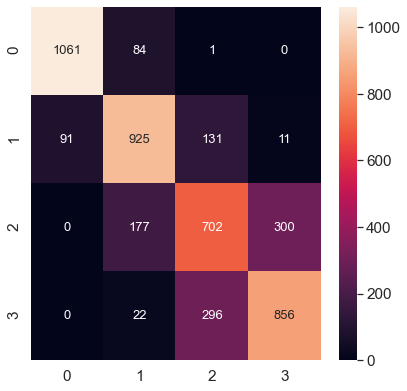

Classifying 802.11ac dataRateMean using features: ['rssiMean', 'receiverDist', 'receiverSpeed', 'meanBeaconRssi']

Discretizing dataRateMean using 4 quantiles, yielding bins:
 [Interval(-0.001, 36.789, closed='right')
 Interval(36.789, 206.573, closed='right')
 Interval(206.573, 348.193, closed='right')
 Interval(348.193, 400.0, closed='right')] 

Accuracy of k-nearest neighbors: 0.8357311573974662
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1175
           1       0.79      0.78      0.79      1150
           2       0.75      0.75      0.75      1133
           3       0.89      0.88      0.88      1199

    accuracy                           0.84      4657
   macro avg       0.83      0.83      0.83      4657
weighted avg       0.84      0.84      0.84      4657

Confusion matrix:


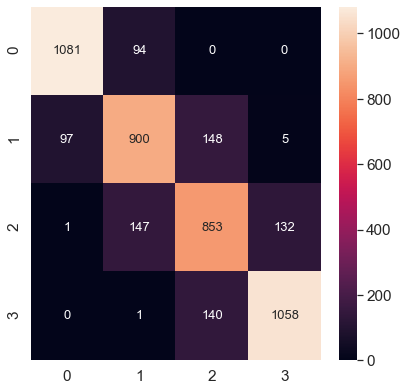

Classifying 802.11ad dataRateMean using features: ['receiverDist', 'receiverSpeed', 'meanBeaconRssi', 'snrMean']

Discretizing dataRateMean using 4 quantiles, yielding bins:
 [Interval(-0.001, 2310.0, closed='right')] 

Accuracy of k-nearest neighbors: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4657

    accuracy                           1.00      4657
   macro avg       1.00      1.00      1.00      4657
weighted avg       1.00      1.00      1.00      4657

Confusion matrix:


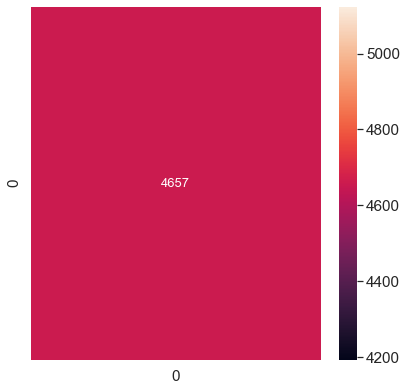

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

target = 'dataRateMean' # variable we're trying to predict
for wifiType in ('n', 'ac', 'ad'): # separate data by wifi type
    fdf = dframe.loc[dframe['wifiType'] == wifiType] # filter out unwanted rows
    featureList = ['rssiMean', 'receiverDist', 'receiverSpeed', 'meanBeaconRssi'] # features of interest
    # replace rssi with snr for ad, if needed
    if wifiType == 'ad' and 'rssiMean' in featureList:
        featureList.remove('rssiMean')
        featureList.append('snrMean')
    featDropList = [] # drop the features we won't be using
    for feature in fdf.columns:
        if feature not in featureList and feature != target:
            featDropList.append(feature)
    fdf.drop(featDropList, axis=1, inplace=True)
    fdf.reset_index(inplace=True, drop=True)
    print("Classifying 802.11%s %s using features: %s\n" %
    (wifiType, target, featureList))
    # discretize target variable
    # start by printing some information about the bins
    nquantiles = 4
    uniBins = pandas.qcut(fdf[target], q=nquantiles, duplicates='drop').unique()
    uniBins = uniBins.ravel() # convert data to an array for sorting
    uniBins.sort()
    print("Discretizing", target, "using", nquantiles,
    "quantiles, yielding bins:\n", uniBins, "\n")
    fdf[target] = pandas.qcut(fdf[target], q=nquantiles, labels=False,
    duplicates='drop')
    # split data set into features and target labels
    x = fdf.drop(target, axis=1) # x contains all the features of interest
    y = fdf[target] # y contains only the target label
    # split data into training and test subsets:
    # - xTrain and yTrain contain features and labels for training
    # - xTest and yTest contain features and labels for testing
    # test_size=0.3 means 30% data for testing
    # random_state=1, is the seed value used by the random number generator
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3,
    random_state=1)
    clfKnn = KNeighborsClassifier()
    clfKnn.fit(xTrain, yTrain) # train classifier
    yPred = clfKnn.predict(xTest) # predict on the unseen data
    print("Accuracy of k-nearest neighbors:", accuracy_score(yTest, yPred))
    print(classification_report(yTest, yPred))
    # display a confusion matrix
    print("Confusion matrix:")
    cmat = confusion_matrix(yTest, yPred)
    plt.figure(figsize=(6.5, 6.5)) # new figure
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(cmat, annot=True, annot_kws={"size": 13}, fmt='g')
    plt.show()

## NOTES on the HEAt MAhAPP
When we run classification..snkgsfndl on just RSSI mean, the precision, recall, and f1-score are all lower than when we run over distance and speed as well, telling us that these are strong indicators for data rate mean as well.
Without meanBeaconRssi
           0       0.93      0.93      0.93      1146
           1       0.74      0.79      0.77      1158
           2       0.61      0.59      0.60      1179
           3       0.75      0.73      0.74      1174


When we divide the quantiles exponentially...

clean up code, write more blurbs

why do ad be like that? am it becuse spikey? yee...

human noises for humans dinosaur noises for dinosaurs therefore thusly yes

You can tell because of the way it is.